In [1]:
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import(
                                    StratifiedKFold,
                                    cross_validate
)
from sklearn.metrics import (
                            accuracy_score,
                            precision_score,
                            confusion_matrix
)

### 1. Load the data

In [2]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/y_test.npz')['arr_0']

### 2. Define Multi Models


In [3]:
models = {
           "Logistic Regression" : LogisticRegression(),
           "Decision Tree" : DecisionTreeClassifier(),
           "Random Forest" : RandomForestClassifier()
}

### 3. Configure K-Fold CV

In [4]:
cv = StratifiedKFold(
                    n_splits=6,
                    random_state=42,
                    shuffle=True
)

In [5]:
trained_models = {}

for model_name, model in models.items():
    print(f"\nCross Validation on {model_name}")

    cv_results = cross_validate(
                            model,
                            X_train,
                            Y_train,
                            cv=cv, scoring='f1',
                            return_estimator=True,
                            return_train_score=False
    )
    print(cv_results)

    test_scores = cv_results['test_score']
    print(test_scores)

    best_index = np.argmax(test_scores)

    estimator = cv_results['estimator'][best_index]
    trained_models[model_name] = estimator


Cross Validation on Logistic Regression


c:\Users\pasin\anaconda3\envs\bprmls\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\pasin\anaconda3\envs\bprmls\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

{'fit_time': array([0.08769155, 0.09967661, 0.11346745, 0.11132956, 0.08902359,
       0.09179235]), 'score_time': array([0.00399971, 0.00528121, 0.0034337 , 0.00598502, 0.00255299,
       0.00401378]), 'estimator': [LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression()], 'test_score': array([0.80445372, 0.79971989, 0.78688525, 0.80812325, 0.79749478,
       0.8039632 ])}
[0.80445372 0.79971989 0.78688525 0.80812325 0.79749478 0.8039632 ]

Cross Validation on Decision Tree
{'fit_time': array([0.06202555, 0.03888416, 0.0366509 , 0.03193307, 0.03202677,
       0.03185344]), 'score_time': array([0.00400972, 0.00299764, 0.00201559, 0.0024128 , 0.00199962,
       0.00199795]), 'estimator': [DecisionTreeClassifier(), DecisionTreeClassifier(), DecisionTreeClassifier(), DecisionTreeClassifier(), DecisionTreeClassifier(), DecisionTreeClassifier()], 'test_score': array([0.76237624, 0.76293103, 0.76529161, 0.78766141, 0.

In [6]:
trained_models

{'Logistic Regression': LogisticRegression(),
 'Decision Tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier()}

In [7]:
Y_hat_tests = {}
for model_name, model in trained_models.items():
    Y_hat_test = model.predict(X_test)
    Y_hat_tests[model_name] = Y_hat_test

Y_hat_tests

{'Logistic Regression': array([1, 0, 0, ..., 0, 0, 0], shape=(1409,)),
 'Decision Tree': array([1, 0, 0, ..., 0, 0, 1], shape=(1409,)),
 'Random Forest': array([1, 0, 0, ..., 0, 0, 1], shape=(1409,))}

In [8]:
cm1 = confusion_matrix(Y_test, Y_hat_tests["Logistic Regression"])
cm2 = confusion_matrix(Y_test, Y_hat_tests["Decision Tree"])
cm3 = confusion_matrix(Y_test, Y_hat_tests["Random Forest"])

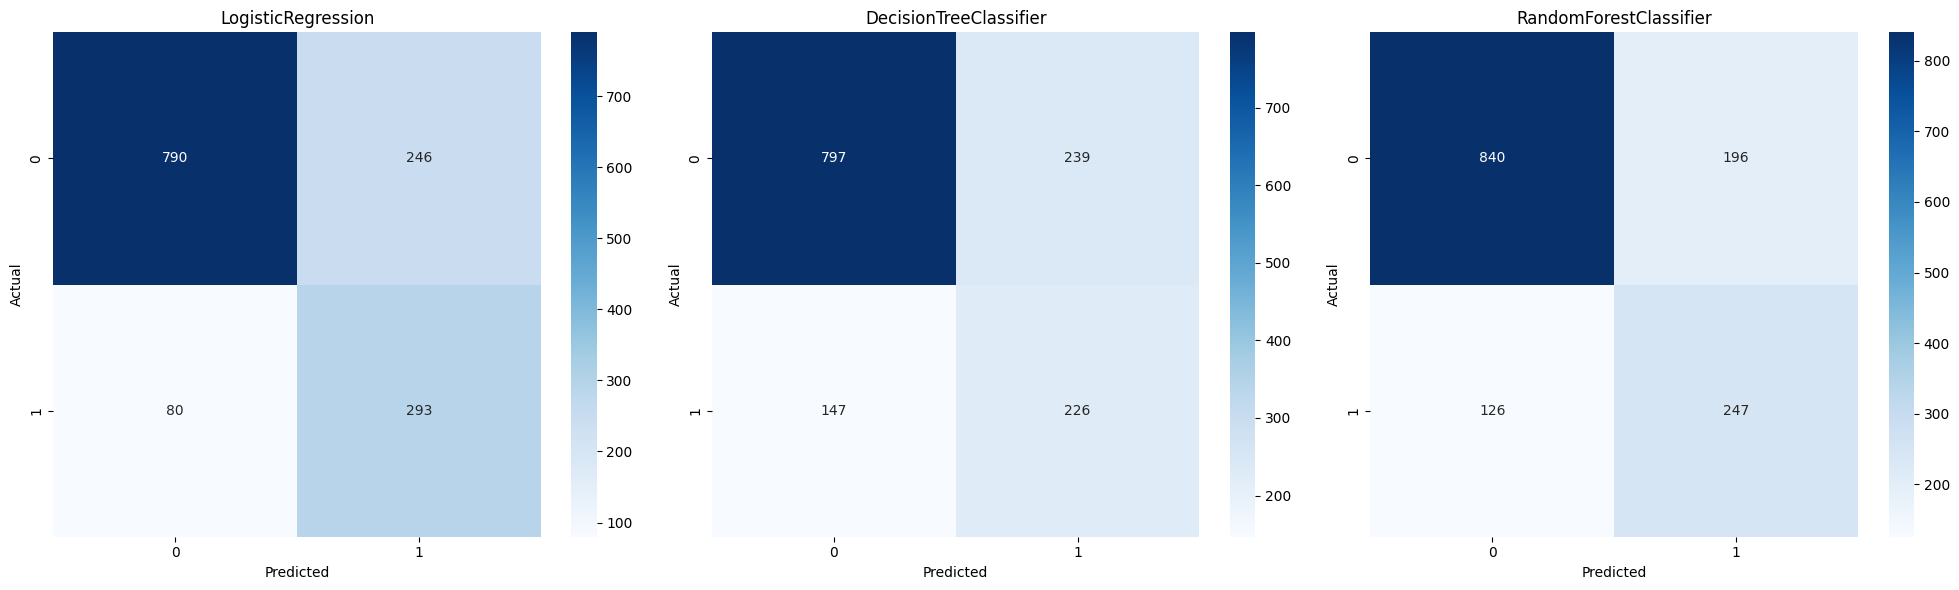

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('LogisticRegression')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('DecisionTreeClassifier')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', ax=ax3)
ax3.set_title('RandomForestClassifier')
ax3.set_xlabel('Predicted')
ax3.set_ylabel('Actual')

plt.tight_layout()
plt.show()


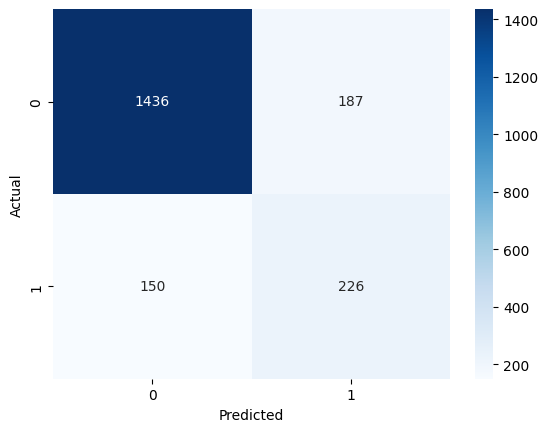

In [8]:
cm = confusion_matrix(Y_test, Y_hat_test)
cm
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()